# Tarefa 1 - Análise dos Datasets do Hippocampus

Os ***datasets de treino e teste do hippocampus*** são usados para desenvolver e avaliar modelos de Machine Learning que preveem a progressão de MCI para Alzheimer. O hippocampus é escolhido pela sua importância na memória e relação com o Alzheimer, enquanto o lobo occipital é utilizado como controle, por não ser associado à demência. A comparação entre esses datasets permite validar a relevância do hippocampus na predição da progressão para Alzheimer.

In [2]:
! pip install researchpy

In [3]:
import pandas as pd
import sklearn as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Data Study

Aqui começamos, por importar os datasets, ***DShippo***, para pudermos iniciar o processo de análise e estudo do mesmo.

In [4]:
df_treino = pd.read_csv('./datasets/train_radiomics_hipocamp.csv')
df_teste = pd.read_csv('./datasets/test_radiomics_hipocamp.csv')
pd.options.display.max_columns = None

Começamos por imprimir as primeiras linhas dos datasets.

In [5]:
df_treino.head()

ID                                              Image  \
0  006_S_0681  /notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...   
1  941_S_1203  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...   
2  011_S_0003  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...   
3  057_S_0779  /notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...   
4  033_S_0920  /notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...   

                                                Mask  \
0  /notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...   
1  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...   
2  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...   
3  /notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...   
4  /notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...   

  diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0                            2.2.0                     1.18.5   
1                            2.2.0                     1.18.5   
2                            2.2.0                     1.18.5   
3                            2.2.0                     1.18.5   
4                            2.2.0                     1.18.5   

  diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                          1.2.4                          1.1.1   
1                          1.2.4                          1.1.1   
2                          1.2.4                          1.1.1   
3                          1.2.4                          1.1.1   
4                          1.2.4                          1.1.1   

  diagnostics_Versions_Python  \
0                       3.7.7   
1                       3.7.7   
2                       3.7.7   
3                       3.7.7   
4                       3.7.7   

                  diagnostics_Configuration_Settings  \
0  {'minimumROIDimensions': 2, 'minimumROISize': ...   
1  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2  {'minimumROIDimensions': 2, 'minimumROISize': ...   
3  {'minimumROIDimensions': 2, 'minimumROISize': ...   
4  {'minimumROIDimensions': 2, 'minimumROISize': ...   

         diagnostics_Configuration_EnabledImageTypes  \
0  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
1  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
2  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
3  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
4  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   

            diagnostics_Image-original_Hash  \
0  b5d774a32163a7ee822d42a07808a787f8687f56   
1  397042d736bd790b7880b372b1749ff424f89cbe   
2  84d679a88812c4aaf03a6d99f00c913b2f64506f   
3  168f330d2ca3f097146e5d041f33b40672d230df   
4  ea5f291ea107dfda5e5c725eae7c0555ced44ce4   

   diagnostics_Image-original_Dimensionality  \
0                                          3   
1                                          3   
2                                          3   
3                                          3   
4                                          3   

  diagnostics_Image-original_Spacing diagnostics_Image-original_Size  \
0                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
1                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
2                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
3                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
4                    (1.0, 1.0, 1.0)                 (256, 256, 256)   

   diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
0                         5.848123                                   0   
1                         5.238834                                   0   
2                         6.816667                                   0   
3                         6.445162                                   0   
4                         5.568269                                   0   

   diagnostics_Image-original_Maximum  \
0                                 178   
1                                 190   
2                        

In [6]:
df_teste.head()

ID                                              Image  \
0  941_S_1194  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_119...   
1  036_S_0945  /notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_094...   
2  024_S_1171  /notebooks/disk2/DS2_FreeSurfer/ADNI_024_S_117...   
3  035_S_0555  /notebooks/disk2/DS2_FreeSurfer/ADNI_035_S_055...   
4  023_S_0081  /notebooks/disk2/DS2_FreeSurfer/ADNI_023_S_008...   

                                                Mask  \
0  /notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_119...   
1  /notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_094...   
2  /notebooks/disk2/DS2_FreeSurfer/ADNI_024_S_117...   
3  /notebooks/disk2/DS2_FreeSurfer/ADNI_035_S_055...   
4  /notebooks/disk2/DS2_FreeSurfer/ADNI_023_S_008...   

  diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
0                            2.2.0                     1.18.5   
1                            2.2.0                     1.18.5   
2                            2.2.0                     1.18.5   
3                            2.2.0                     1.18.5   
4                            2.2.0                     1.18.5   

  diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
0                          1.2.4                          1.1.1   
1                          1.2.4                          1.1.1   
2                          1.2.4                          1.1.1   
3                          1.2.4                          1.1.1   
4                          1.2.4                          1.1.1   

  diagnostics_Versions_Python  \
0                       3.7.7   
1                       3.7.7   
2                       3.7.7   
3                       3.7.7   
4                       3.7.7   

                  diagnostics_Configuration_Settings  \
0  {'minimumROIDimensions': 2, 'minimumROISize': ...   
1  {'minimumROIDimensions': 2, 'minimumROISize': ...   
2  {'minimumROIDimensions': 2, 'minimumROISize': ...   
3  {'minimumROIDimensions': 2, 'minimumROISize': ...   
4  {'minimumROIDimensions': 2, 'minimumROISize': ...   

         diagnostics_Configuration_EnabledImageTypes  \
0  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
1  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
2  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
3  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
4  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   

            diagnostics_Image-original_Hash  \
0  b4977b66eca7c1e38c03fb5193cca7ca01dd46ec   
1  43850cb7e611c0438dbf2fee1f5800d548de621f   
2  a27b647efa22a9d77a17a07e92657722a268552d   
3  cbd443cf571aaa826bebc6cc9d4bf80f91afd938   
4  41ce7f75ad8398dc3a8dfe4ea5debd4a84aac204   

   diagnostics_Image-original_Dimensionality  \
0                                          3   
1                                          3   
2                                          3   
3                                          3   
4                                          3   

  diagnostics_Image-original_Spacing diagnostics_Image-original_Size  \
0                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
1                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
2                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
3                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
4                    (1.0, 1.0, 1.0)                 (256, 256, 256)   

   diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
0                         5.936274                                   0   
1                         6.727111                                   0   
2                         6.788788                                   0   
3                         6.925492                                   0   
4                         5.273378                                   0   

   diagnostics_Image-original_Maximum  \
0                                 138   
1                                 179   
2                        

De seguida, imprimimos as últimas linhas dos datasets.

In [7]:
df_treino.tail()

ID                                              Image  \
300  094_S_1241  /notebooks/disk2/DS2_FreeSurfer/ADNI_094_S_124...   
301  067_S_0177  /notebooks/disk2/DS2_FreeSurfer/ADNI_067_S_017...   
302  036_S_0748  /notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_074...   
303  053_S_0621  /notebooks/disk2/DS2_FreeSurfer/ADNI_053_S_062...   
304  141_S_0767  /notebooks/disk2/DS2_FreeSurfer/ADNI_141_S_076...   

                                                  Mask  \
300  /notebooks/disk2/DS2_FreeSurfer/ADNI_094_S_124...   
301  /notebooks/disk2/DS2_FreeSurfer/ADNI_067_S_017...   
302  /notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_074...   
303  /notebooks/disk2/DS2_FreeSurfer/ADNI_053_S_062...   
304  /notebooks/disk2/DS2_FreeSurfer/ADNI_141_S_076...   

    diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
300                            2.2.0                     1.18.5   
301                            2.2.0                     1.18.5   
302                            2.2.0                     1.18.5   
303                            2.2.0                     1.18.5   
304                            2.2.0                     1.18.5   

    diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
300                          1.2.4                          1.1.1   
301                          1.2.4                          1.1.1   
302                          1.2.4                          1.1.1   
303                          1.2.4                          1.1.1   
304                          1.2.4                          1.1.1   

    diagnostics_Versions_Python  \
300                       3.7.7   
301                       3.7.7   
302                       3.7.7   
303                       3.7.7   
304                       3.7.7   

                    diagnostics_Configuration_Settings  \
300  {'minimumROIDimensions': 2, 'minimumROISize': ...   
301  {'minimumROIDimensions': 2, 'minimumROISize': ...   
302  {'minimumROIDimensions': 2, 'minimumROISize': ...   
303  {'minimumROIDimensions': 2, 'minimumROISize': ...   
304  {'minimumROIDimensions': 2, 'minimumROISize': ...   

           diagnostics_Configuration_EnabledImageTypes  \
300  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
301  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
302  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
303  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
304  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   

              diagnostics_Image-original_Hash  \
300  378e450ae013e20e1fbf6e0b3ec9a27adcabb48d   
301  fcc41c968ebeb6980d175c41dbf6dd80befa801e   
302  8123ad6d9ff372737d94e146c7174e2f32b7b44a   
303  cb03c6cd87f3c5eb6485b54d47a7cc8902db4598   
304  63aca41d5c87b25b6004b6338fbb9c6f8ca3efa0   

     diagnostics_Image-original_Dimensionality  \
300                                          3   
301                                          3   
302                                          3   
303                                          3   
304                                          3   

    diagnostics_Image-original_Spacing diagnostics_Image-original_Size  \
300                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
301                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
302                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
303                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
304                    (1.0, 1.0, 1.0)                 (256, 256, 256)   

     diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
300                         6.268191                                   0   
301                         4.846839                                   0   
302                         6.562003                                   0   
303                         7.583210                                   0   
304                         5.329772                                   0   

     diagnostics_I

In [8]:
df_teste.tail()

ID                                              Image  \
95  036_S_1135  /notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_113...   
96  011_S_0183  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_018...   
97  021_S_0984  /notebooks/disk2/DS2_FreeSurfer/ADNI_021_S_098...   
98  052_S_0951  /notebooks/disk2/DS2_FreeSurfer/ADNI_052_S_095...   
99  037_S_0566  /notebooks/disk2/DS2_FreeSurfer/ADNI_037_S_056...   

                                                 Mask  \
95  /notebooks/disk2/DS2_FreeSurfer/ADNI_036_S_113...   
96  /notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_018...   
97  /notebooks/disk2/DS2_FreeSurfer/ADNI_021_S_098...   
98  /notebooks/disk2/DS2_FreeSurfer/ADNI_052_S_095...   
99  /notebooks/disk2/DS2_FreeSurfer/ADNI_037_S_056...   

   diagnostics_Versions_PyRadiomics diagnostics_Versions_Numpy  \
95                            2.2.0                     1.18.5   
96                            2.2.0                     1.18.5   
97                            2.2.0                     1.18.5   
98                            2.2.0                     1.18.5   
99                            2.2.0                     1.18.5   

   diagnostics_Versions_SimpleITK diagnostics_Versions_PyWavelet  \
95                          1.2.4                          1.1.1   
96                          1.2.4                          1.1.1   
97                          1.2.4                          1.1.1   
98                          1.2.4                          1.1.1   
99                          1.2.4                          1.1.1   

   diagnostics_Versions_Python  \
95                       3.7.7   
96                       3.7.7   
97                       3.7.7   
98                       3.7.7   
99                       3.7.7   

                   diagnostics_Configuration_Settings  \
95  {'minimumROIDimensions': 2, 'minimumROISize': ...   
96  {'minimumROIDimensions': 2, 'minimumROISize': ...   
97  {'minimumROIDimensions': 2, 'minimumROISize': ...   
98  {'minimumROIDimensions': 2, 'minimumROISize': ...   
99  {'minimumROIDimensions': 2, 'minimumROISize': ...   

          diagnostics_Configuration_EnabledImageTypes  \
95  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
96  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
97  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
98  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   
99  {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...   

             diagnostics_Image-original_Hash  \
95  6e2e1e871fbbfb6ca9be6fba821330eb38cc8b08   
96  96d7a5a8fb1e2c1af9cf849bae245cf35bed7978   
97  d5f8ddf7c63d3a34033df5b0a089a552e37c3aba   
98  95c4391562e2afefa5fa5f57e5fd4b5caffd94cd   
99  70b9c29179f22588b832112a02d5edac6b23e64e   

    diagnostics_Image-original_Dimensionality  \
95                                          3   
96                                          3   
97                                          3   
98                                          3   
99                                          3   

   diagnostics_Image-original_Spacing diagnostics_Image-original_Size  \
95                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
96                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
97                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
98                    (1.0, 1.0, 1.0)                 (256, 256, 256)   
99                    (1.0, 1.0, 1.0)                 (256, 256, 256)   

    diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
95                         5.644257                                   0   
96                         5.732508                                   0   
97                         6.553404                                   0   
98                         6.109190                                   0   
99                         5.290213                                   0   

    diagnostics_Image-original_Maximum  \
95                                 165   

In [9]:
df_treino.shape

(305, 2181)

In [10]:
df_teste.shape

(100, 2180)

Com o comando ***shape***, conseguimos verificar que existem ***305 entradas/linhas e 2181 atributos/colunas*** no dataset de treino, e que existem ***100 entradas/linhas e 2181 atributos/colunas*** no dataset de teste.
Para percebermos melhor o dataset, vamos utilizar o comando ***describe***, para visualizar as nossas estatísticas descritivas:

In [11]:
df_treino.describe()

diagnostics_Image-original_Dimensionality  \
count                                      305.0   
mean                                         3.0   
std                                          0.0   
min                                          3.0   
25%                                          3.0   
50%                                          3.0   
75%                                          3.0   
max                                          3.0   

       diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
count                       305.000000                               305.0   
mean                          5.810469                                 0.0   
std                           0.613858                                 0.0   
min                           4.321602                                 0.0   
25%                           5.317298                                 0.0   
50%                           5.811449                                 0.0   
75%                           6.237751                                 0.0   
max                           7.583210                                 0.0   

       diagnostics_Image-original_Maximum  diagnostics_Mask-original_VoxelNum  \
count                          305.000000                          305.000000   
mean                           173.504918                         6714.790164   
std                             24.108871                         1066.815670   
min                            128.000000                         3609.000000   
25%                            157.000000                         5941.000000   
50%                            172.000000                         6723.000000   
75%                            190.000000                         7396.000000   
max                            255.000000                         9453.000000   

       diagnostics_Mask-original_VolumeNum  original_shape_Elongation  \
count                                305.0                 305.000000   
mean                                   2.0                   0.411819   
std                                    0.0                   0.028993   
min                                    2.0                   0.330890   
25%                                    2.0                   0.392944   
50%                                    2.0                   0.412479   
75%                                    2.0                   0.431621   
max                                    2.0                   0.491496   

       original_shape_Flatness  original_shape_LeastAxisLength  \
count               305.000000                      305.000000   
mean                  0.096916                       10.137707   
std                   0.009739                        0.911329   
min                   0.075142                        8.420713   
25%                   0.089977                        9.525253   
50%                   0.096609                       10.106838   
75%                   0.102240                       10.635093   
max                   0.144082                       14.370911   

       original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
count                      305.000000                              305.000000   
mean                       104.883349                               74.609887   
std                          6.180335                                4.077476   
min                         90.675836                               64.327288   
25%                        100.501871                               71.568149   
50%                        104.370667                               74.545288   
75%                        108.677326                               77.317527   
max                        126.209296                               89.140339   

       original_shape_Maximum2DDiameterRow  \
count                           305.000000   
mean                          

In [12]:
df_teste.describe()

diagnostics_Image-original_Dimensionality  \
count                                      100.0   
mean                                         3.0   
std                                          0.0   
min                                          3.0   
25%                                          3.0   
50%                                          3.0   
75%                                          3.0   
max                                          3.0   

       diagnostics_Image-original_Mean  diagnostics_Image-original_Minimum  \
count                       100.000000                               100.0   
mean                          5.770315                                 0.0   
std                           0.704595                                 0.0   
min                           4.108809                                 0.0   
25%                           5.275968                                 0.0   
50%                           5.670718                                 0.0   
75%                           6.191261                                 0.0   
max                           7.737283                                 0.0   

       diagnostics_Image-original_Maximum  diagnostics_Mask-original_VoxelNum  \
count                          100.000000                          100.000000   
mean                           168.940000                         6711.730000   
std                             24.625199                         1112.098052   
min                            126.000000                         4011.000000   
25%                            153.750000                         6039.750000   
50%                            168.000000                         6588.500000   
75%                            180.500000                         7487.000000   
max                            235.000000                         9883.000000   

       diagnostics_Mask-original_VolumeNum  original_shape_Elongation  \
count                                100.0                 100.000000   
mean                                   2.0                   0.418495   
std                                    0.0                   0.034216   
min                                    2.0                   0.268536   
25%                                    2.0                   0.399488   
50%                                    2.0                   0.419641   
75%                                    2.0                   0.437669   
max                                    2.0                   0.514587   

       original_shape_Flatness  original_shape_LeastAxisLength  \
count               100.000000                      100.000000   
mean                  0.098133                       10.164511   
std                   0.009457                        0.884544   
min                   0.080628                        8.329650   
25%                   0.091993                        9.552989   
50%                   0.096567                       10.093060   
75%                   0.103951                       10.606888   
max                   0.132980                       13.569278   

       original_shape_MajorAxisLength  original_shape_Maximum2DDiameterColumn  \
count                      100.000000                              100.000000   
mean                       103.825294                               74.254728   
std                          6.036510                                4.044621   
min                         90.895819                               65.802736   
25%                         99.808994                               71.918073   
50%                        103.624223                               73.549303   
75%                        106.550650                               76.512901   
max                        127.996158                               89.274856   

       original_shape_Maximum2DDiameterRow  \
count                           100.000000   
mean                          

Para obtermos um resumo da informação contida no dataset, utilizamos o comando ***info***, para extrair toda a informação necesssária sobre o mesmo:

In [13]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2181 entries, ID to Transition
dtypes: float64(2014), int64(147), object(20)
memory usage: 5.1+ MB


In [14]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 2180 entries, ID to Age
dtypes: float64(2011), int64(150), object(19)
memory usage: 1.7+ MB


### Missing Values

Para estender o nosso conhecimento sobre os datasets, vamos verificar a quantidade de missing values nos mesmos:

In [15]:
df_treino.isna().any()[df_treino.isna().any()]

Series([], dtype: bool)

In [16]:
df_teste.isna().any()[df_teste.isna().any()]

Series([], dtype: bool)

In [17]:
missing_values = df_treino.isna().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [18]:
missing_values = df_teste.isna().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Com estes outputs, conseguimos verificar que não existem quaisquer missing values nos nossos datasets.

### Duplicated Values

Agora iniciamos outra análise importante. Vamos verificar o nº de linhas duplicadas que existem nos nossos datasets:

In [19]:
df_treino.duplicated().sum()

0

In [20]:
df_teste.duplicated().sum()

0

Com este output, conseguimos verificar que não existem quaisquer duplicated values nos nossos datasets.

Depois da nossa análise aos nossos datasets, verificamos que estes:
- ***Tem 305 entradas/linhas, no caso do df_treino e no caso do df_teste tem 100 entradas/linhas;***
- ***Tem 2181 atributos/colunas, nos dois casos;***
- ***Não têm quaisquer valores nulos;***
- ***Não têm quaisquer valores duplicados.***

### Colunas duplicadas nos datasets

Aqui vamos verificar nos dois datasets, aqueles que têm colunas duplicadas, ou seja, com os mesmos valores em colunas diferentes. Isto depois de juntar uma análise à importância de atributos pode nos ajudar a limpar o nosso dataset, poupando recursos como memória, processamento de dados e tempo de execução do notebook.

In [21]:
duplicated_columns = df_treino.T.duplicated(keep=False)
duplicated_columns1 = df_teste.T.duplicated(keep=False)

# Filtrar apenas as colunas duplicadas e seus conteúdos
duplicated_data = df_treino.loc[:, duplicated_columns]
duplicated_data1 = df_teste.loc[:, duplicated_columns1]

# Verificar se existem colunas duplicadas e exibir o número de duplicadas
if duplicated_data.empty:
    print("Nenhuma coluna duplicada encontrada.")
else:
    # Contar o número de colunas duplicadas
    num_duplicated_columns = duplicated_data.shape[1]
    print(f"Número de colunas duplicadas no dataset de treino: {num_duplicated_columns}")

# Verificar se existem colunas duplicadas e exibir o número de duplicadas
if duplicated_data1.empty:
    print("Nenhuma coluna duplicada encontrada.")
else:
    # Contar o número de colunas duplicadas
    num_duplicated_columns1 = duplicated_data1.shape[1]
    print(f"Número de colunas duplicadas no dataset de teste: {num_duplicated_columns1}")

Número de colunas duplicadas no dataset de treino: 316
Número de colunas duplicadas no dataset de teste: 321


### Colunas com valores únicos

Depois de uma breve análise, verificamos que existiam colunas que para as 305 entradas e para as 100 entradas, tinham um valor único. Quando uma coluna contém o mesmo valor para todas as 305 ou 100 entradas, esta não ajuda a distinguir entre as observações e não contribui para a construção de modelos, análises estatísticas, ou para entender padrões nos dados. Estas colunas podem ser consideradas redundantes e ocupam espaço desnecessário, o que também pode prejudicar a eficiência computacional ao aumentar o tempo de processamento.


In [22]:
constant_columns = df_treino.columns[df_treino.nunique() == 1]
print(constant_columns)

constant_columns1 = df_teste.columns[df_teste.nunique() == 1]
print(constant_columns1)

Index(['diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
       'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet',
       'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings',
       'diagnostics_Configuration_EnabledImageTypes',
       'diagnostics_Image-original_Dimensionality',
       'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size',
       ...
       'lbp-3D-m2_glszm_HighGrayLevelZoneEmphasis',
       'lbp-3D-m2_glszm_LowGrayLevelZoneEmphasis',
       'lbp-3D-m2_glszm_SizeZoneNonUniformity',
       'lbp-3D-m2_glszm_SizeZoneNonUniformityNormalized',
       'lbp-3D-m2_glszm_ZoneEntropy', 'lbp-3D-m2_ngtdm_Busyness',
       'lbp-3D-m2_ngtdm_Coarseness', 'lbp-3D-m2_ngtdm_Complexity',
       'lbp-3D-m2_ngtdm_Contrast', 'lbp-3D-m2_ngtdm_Strength'],
      dtype='object', length=159)
Index(['diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy',
       'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyW

Como podemos verificar, cada um dos datasets tem 159 colunas com valores únicos.

## Visual Data Study

Depois de se analisar umas partes dos dados, que no futuro poderam vir a ser pontos a resolver, vamos agora com a ajuda de gráficos e etc..., analisar mais a fundo um pouco os dados.

### Age

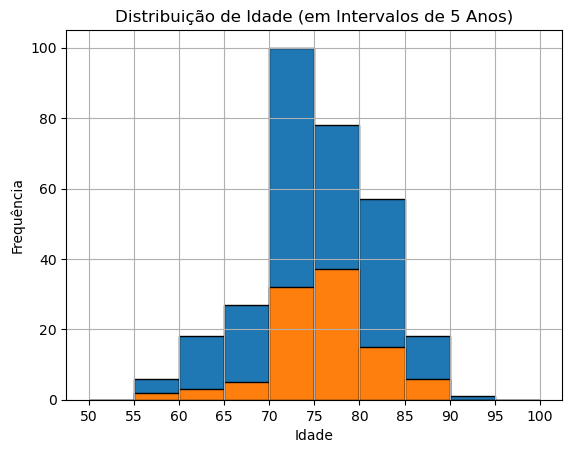

In [23]:
# Definir intervalos de idade de 5 em 5 anos de 50 a 100
bins = range(50, 105, 5)  # Intervalos de 5 anos

# Criar o histograma com os intervalos especificados
df_treino['Age'].hist(bins=bins, edgecolor='black')
df_teste['Age'].hist(bins=bins, edgecolor='black')
plt.title('Distribuição de Idade (em Intervalos de 5 Anos)')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(bins)  # Mostrar as bordas dos bins no eixo x
plt.show()

Com este histograma, conseguimos perceber que em ambos os datasets (treino/azul e teste/laranja), os intervalos de idade com mais MRI's efetuados são os intervalos de *[70-80]*.

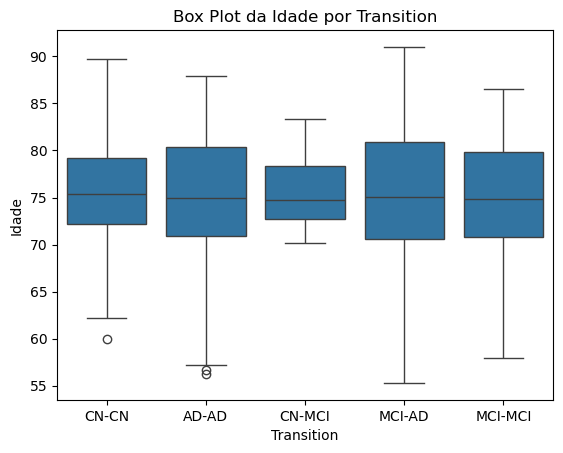

In [24]:
sns.boxplot(x='Transition', y='Age', data=df_treino)
plt.title('Box Plot da Idade por Transition')
plt.xlabel('Transition')
plt.ylabel('Idade')
plt.show()

Este gráfico ajuda a entender se a idade tem uma variação significativa entre os diferentes grupos de transição, o que pode ser relevante em análises sobre a progressão ou prevalência de condições de saúde.

### Sexo

132
173


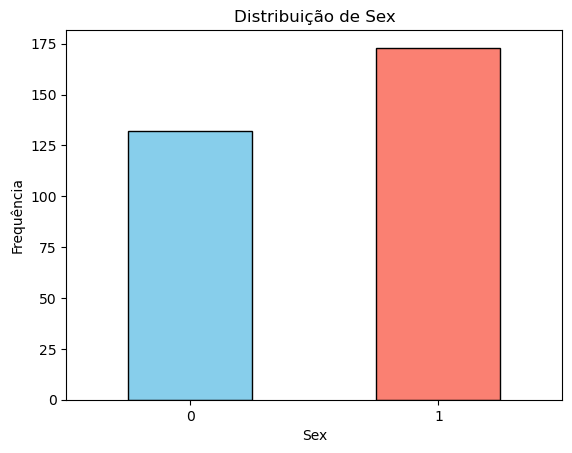

In [30]:
print(len(df_treino[df_treino['Sex'] == 0]))  # Contagem de '0'
print(len(df_treino[df_treino['Sex'] == 1]))  # Contagem de '1'

df_treino['Sex'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribuição de Sex')
plt.xlabel('Sex')
plt.ylabel('Frequência')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)  # Define os rótulos como '0' e '1'
plt.show()

Sex          0   1
Transition        
AD-AD       29  31
CN-CN       48  48
CN-MCI       6   4
MCI-AD      25  43
MCI-MCI     24  47


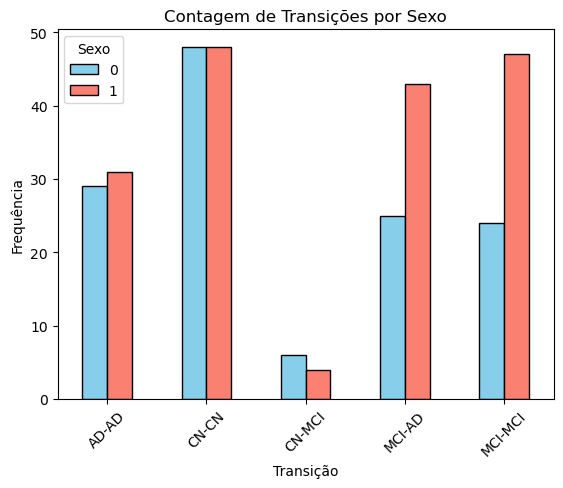

In [25]:
# Contagem de cada categoria de Transition por Sexo
transition_sex_counts = df_treino.groupby(['Transition', 'Sex']).size().unstack()
print(transition_sex_counts)

# Criar o gráfico de barras agrupado para cada Transition por Sexo
transition_sex_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Contagem de Transições por Sexo')
plt.xlabel('Transição')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo X para facilitar a leitura
plt.legend(title='Sexo', labels=['0', '1'])  # Legenda para distinguir os sexos
plt.show()

48
52


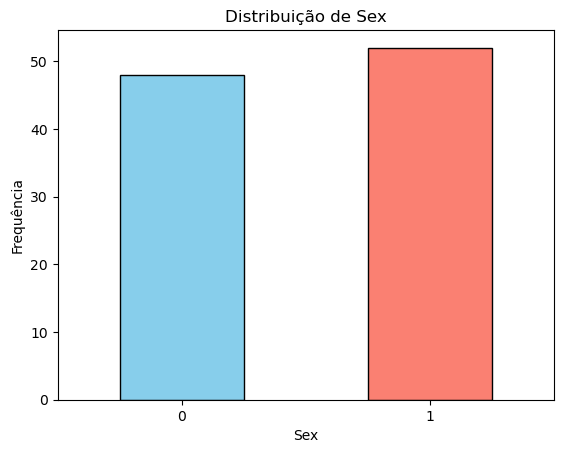

In [31]:
print(len(df_teste[df_teste['Sex'] == 0]))  # Contagem de '0'
print(len(df_teste[df_teste['Sex'] == 1]))  # Contagem de '1'

df_teste['Sex'].value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Distribuição de Sex')
plt.xlabel('Sex')
plt.ylabel('Frequência')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)  # Define os rótulos como '0' e '1'
plt.show()

### Transition

Transition
CN-CN      96
MCI-MCI    71
MCI-AD     68
AD-AD      60
CN-MCI     10
Name: count, dtype: int64


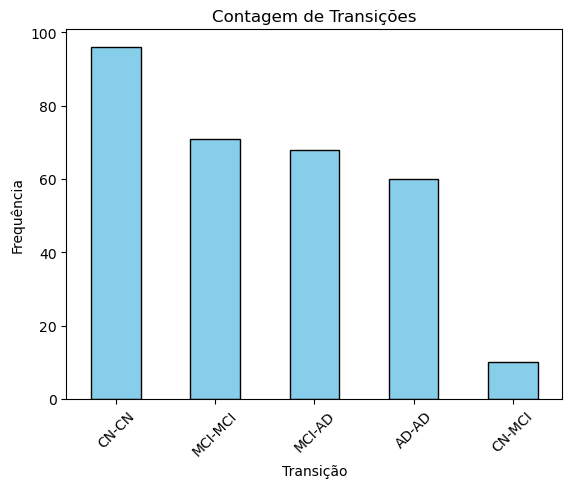

In [27]:
print(df_treino['Transition'].value_counts())
transition_counts = df_treino['Transition'].value_counts()

# Criar o gráfico de barras
transition_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Contagem de Transições')
plt.xlabel('Transição')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para melhor visualização
plt.show()

### Sex e Age

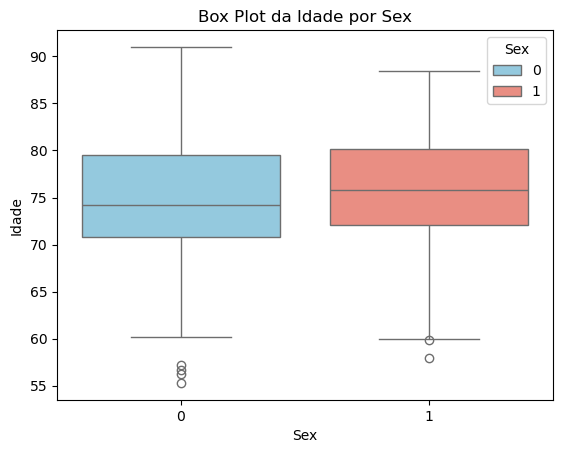

In [31]:
sns.boxplot(x='Sex', y='Age', hue='Sex', palette=['skyblue', 'salmon'], data=df_treino)
plt.title('Box Plot da Idade por Sex')
plt.xlabel('Sex')
plt.ylabel('Idade')
plt.show()

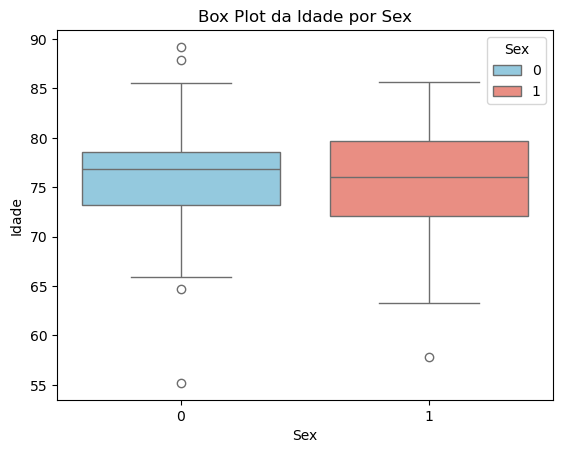

In [32]:
sns.boxplot(x='Sex', y='Age', hue='Sex', palette=['skyblue', 'salmon'], data=df_teste)
plt.title('Box Plot da Idade por Sex')
plt.xlabel('Sex')
plt.ylabel('Idade')
plt.show()